In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\All\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 15)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
input_shape = (X_train.shape[1], X_train.shape[2]) # timesteps, features

In [8]:
# Model architecture with L1 Regularization using GRU
model = Sequential([
    GRU(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    GRU(50, kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 50)             10050     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 25401 (99.22 KB)
Trainable params: 25401 (99.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 9s 4ms/step - loss: 225034.3594 - mse: 225010.7969 - rmse: 463.1570 - mae: 260.9034 - mape: 1256270848.0000 - val_loss: 163740.2344 - val_mse: 163706.6875 - val_rmse: 394.4743 - val_mae: 220.4077 - val_mape: 1096611456.0000
Epoch 2/100
1083/1083 [==============================] - 4s 3ms/step - loss: 137770.2969 - mse: 137730.3906 - rmse: 360.4339 - mae: 205.0140 - mape: 1217596800.0000 - val_loss: 113160.0859 - val_mse: 113115.2578 - val_rmse: 328.6463 - val_mae: 189.7484 - val_mape: 743897216.0000
Epoch 3/100
1083/1083 [==============================] - 4s 3ms/step - loss: 103660.5547 - mse: 103611.3359 - rmse: 314.5228 - mae: 183.3755 - mape: 1141054720.0000 - val_loss: 88543.9844 - val_mse: 88490.7656 - val_rmse: 290.1669 - val_mae: 168.4813 - val_mape: 898971584.0000
Epoch 4/100
1083/1083 [==============================] - 4s 3ms/step - loss: 86691.4609 - mse: 86634.6641 - rmse: 287.2947 - mae: 169.0899 - mape: 1229752960.000

1083/1083 [==============================] - 4s 3ms/step - loss: 39384.4141 - mse: 39267.2617 - rmse: 190.9075 - mae: 112.6764 - mape: 1412361216.0000 - val_loss: 29652.8633 - val_mse: 29535.0176 - val_rmse: 163.3938 - val_mae: 93.8837 - val_mape: 1166672896.0000
Epoch 31/100
1083/1083 [==============================] - 4s 4ms/step - loss: 38888.9727 - mse: 38770.2930 - rmse: 189.7263 - mae: 112.1466 - mape: 1379407616.0000 - val_loss: 28990.8867 - val_mse: 28871.5859 - val_rmse: 161.0872 - val_mae: 91.1145 - val_mape: 1060706432.0000
Epoch 32/100
1083/1083 [==============================] - 4s 3ms/step - loss: 39005.4297 - mse: 38885.3633 - rmse: 190.1784 - mae: 112.4287 - mape: 1392151680.0000 - val_loss: 27963.1953 - val_mse: 27842.5156 - val_rmse: 158.4063 - val_mae: 89.5478 - val_mape: 1118541312.0000
Epoch 33/100
1083/1083 [==============================] - 4s 4ms/step - loss: 39015.3203 - mse: 38893.9219 - rmse: 189.9922 - mae: 112.6390 - mape: 1367306880.0000 - val_loss: 28726.

Epoch 60/100
1083/1083 [==============================] - 9s 8ms/step - loss: 34280.8320 - mse: 34131.3203 - rmse: 177.6944 - mae: 105.3765 - mape: 1389377280.0000 - val_loss: 25208.2969 - val_mse: 25058.2949 - val_rmse: 149.8649 - val_mae: 85.3350 - val_mape: 1098417024.0000
Epoch 61/100
1083/1083 [==============================] - 9s 8ms/step - loss: 34531.8477 - mse: 34381.3906 - rmse: 178.2584 - mae: 105.8372 - mape: 1432060544.0000 - val_loss: 25656.5469 - val_mse: 25505.5410 - val_rmse: 150.5081 - val_mae: 84.5377 - val_mape: 1202006400.0000
Epoch 62/100
1083/1083 [==============================] - 10s 9ms/step - loss: 35334.1875 - mse: 35182.7773 - rmse: 180.1242 - mae: 107.3381 - mape: 1409116032.0000 - val_loss: 24853.2637 - val_mse: 24701.3262 - val_rmse: 148.8238 - val_mae: 84.3932 - val_mape: 1108941568.0000
Epoch 63/100
1083/1083 [==============================] - 9s 8ms/step - loss: 34140.0703 - mse: 33987.6055 - rmse: 177.4153 - mae: 104.7762 - mape: 1405908096.0000 - va

In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 1s 3ms/step - loss: 24752.4434 - mse: 24591.9824 - rmse: 148.8696 - mae: 82.8816 - mape: 1042062784.0000
Test Loss: [24752.443359375, 24591.982421875, 148.86962890625, 82.88155364990234, 1042062784.0]


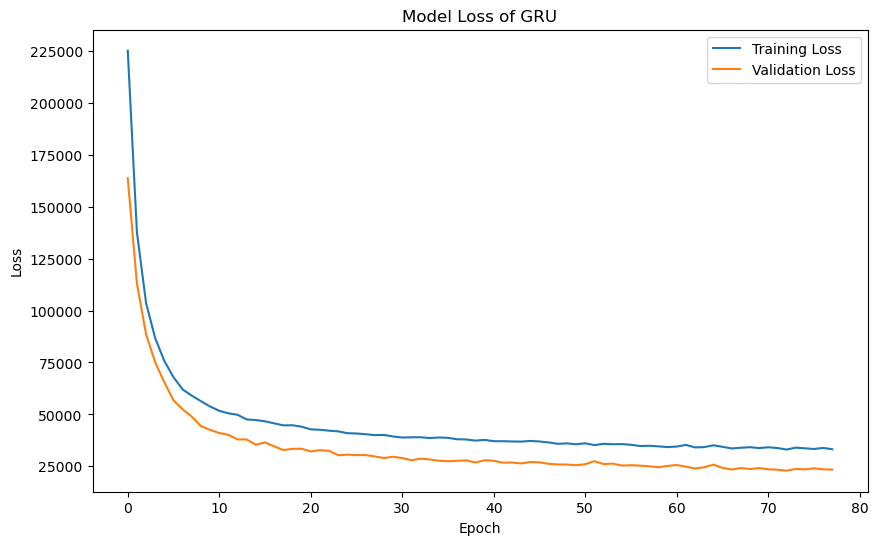

In [14]:
# Assuming history is the output of the model.fit() method
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 2s 3ms/step


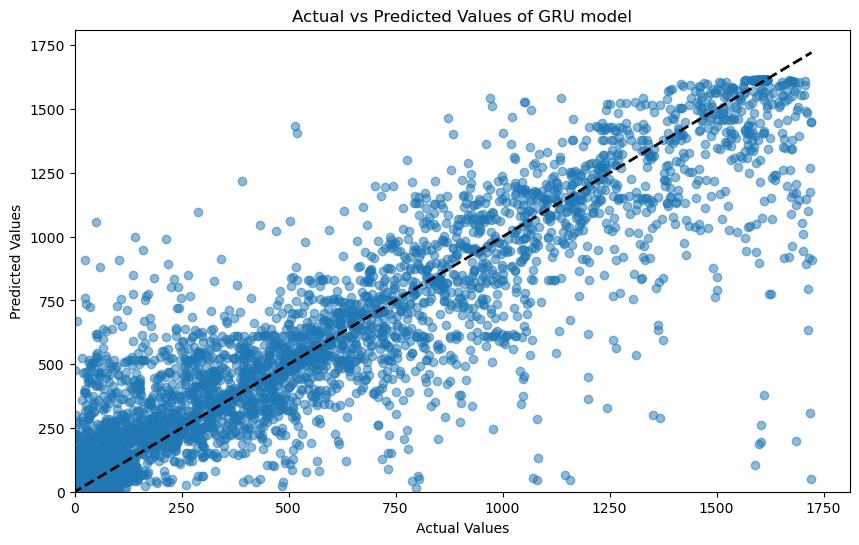

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values of GRU model')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

# Set the limits for x and y axis to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

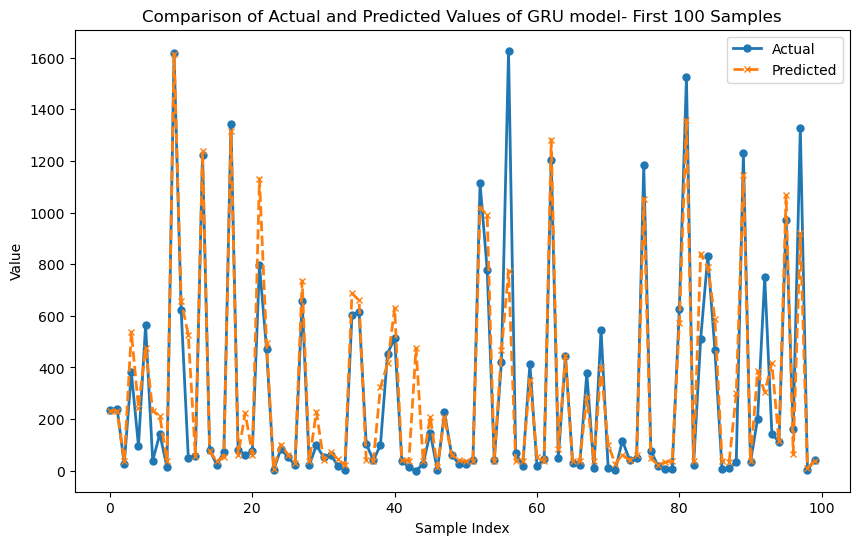

In [17]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values of GRU model- First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

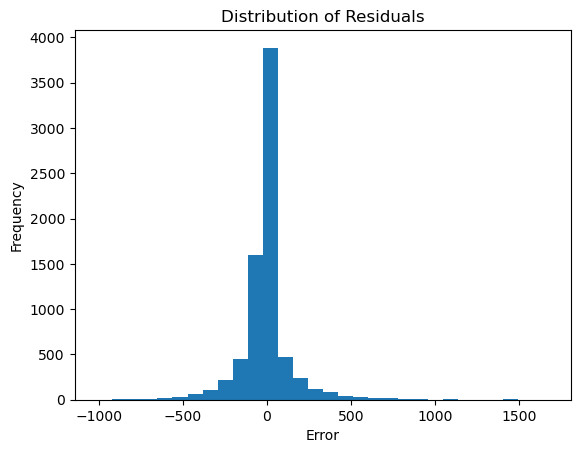

In [18]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 1s 4ms/step - loss: 24752.4434 - mse: 24591.9824 - rmse: 148.8696 - mae: 82.8816 - mape: 1042062784.0000
Test loss (MSE): 24752.443359375
Mean Squared Error (MSE): 24591.982421875
Root Mean Squared Error (RMSE): 148.86962890625
Mean Absolute Error (MAE): 82.88155364990234
Mean Absolute Percentage Error (MAPE): 1042062784.0
